In [51]:
import pandas as pd
from sqlalchemy import create_engine

# Put postgreSQL credeitials into sql_login.py
from sql_login import USERNAME as USERNAME
from sql_login import PASSWORD as PASSWORD

import matplotlib.pyplot as plt
import numpy as np

## Connect to postgreSQL 

In [52]:
connection_string = USERNAME+':'+PASSWORD+"@localhost:5432/avocados"
engine = create_engine(f'postgresql://{connection_string}')
conn = engine.engine.connect()

In [53]:
# Confirm tables
engine.table_names()

['cmg',
 'avo_price',
 'avo_qtr_price',
 'avocada_fsda',
 'corn_fsda',
 'mango_fsda',
 'lime_fsda']

## Put Query Into Pandas DataFrame

In [54]:
fsda_df = pd.read_sql(
"""
SELECT a.year, a.quarter, a.value as "avocado value", a.qty as "avocado qty", 
c.qty as "corn qty", c.price as "corn price", 
m.qty as "mango qty", m.price as "mango price",
l.qty as "lime qty", l.price as "lime price"
FROM 
    avocada_fsda as a 
INNER JOIN
    corn_fsda as c ON (a.quarter=c.quarter AND a.year=c.year)
INNER JOIN 
    mango_fsda as m ON (a.quarter=m.quarter AND a.year=m.year)
INNER JOIN 
    lime_fsda as l ON (a.quarter=l.quarter AND a.year=l.year)
"""            
, conn)

fsda_df

,year,quarter,avocado value,avocado qty,corn qty,corn price,mango qty,mango price,lime qty,lime price
0,2015,1,428238,207247.2,13763.5,0.461293,464327.1,1.921977,101270.3,0.810563
1,2015,2,358099,170643.8,9857.5,0.447477,505477.0,1.506555,118700.5,0.594083
2,2015,3,372958,196283.2,9867.3,0.434263,348003.2,1.264609,139964.9,0.468360
3,2015,4,365019,229894.5,6372.1,0.510193,385540.0,1.918644,117020.3,0.451862
4,2016,1,379309,253587.7,8294.1,0.380150,527981.1,1.982101,113589.3,0.624425
5,2016,2,345835,173885.8,5380.6,0.376166,575985.6,1.569439,128207.7,0.989597
6,2016,3,524672,162963.7,10915.9,0.381462,447233.5,1.200529,146864.2,0.554226
7,2016,4,518525,194638.4,9379.2,0.450571,489631.9,1.821354,130708.0,0.529279
8,2017,1,581869,230198.5,10273.6,0.344183,583105.6,1.970784,116851.5,0.950993
9,2017,2,565303,176879.2,8529.4,0.385138,598278.4,1.580304,156135.4,0.544604


## Generate Plots

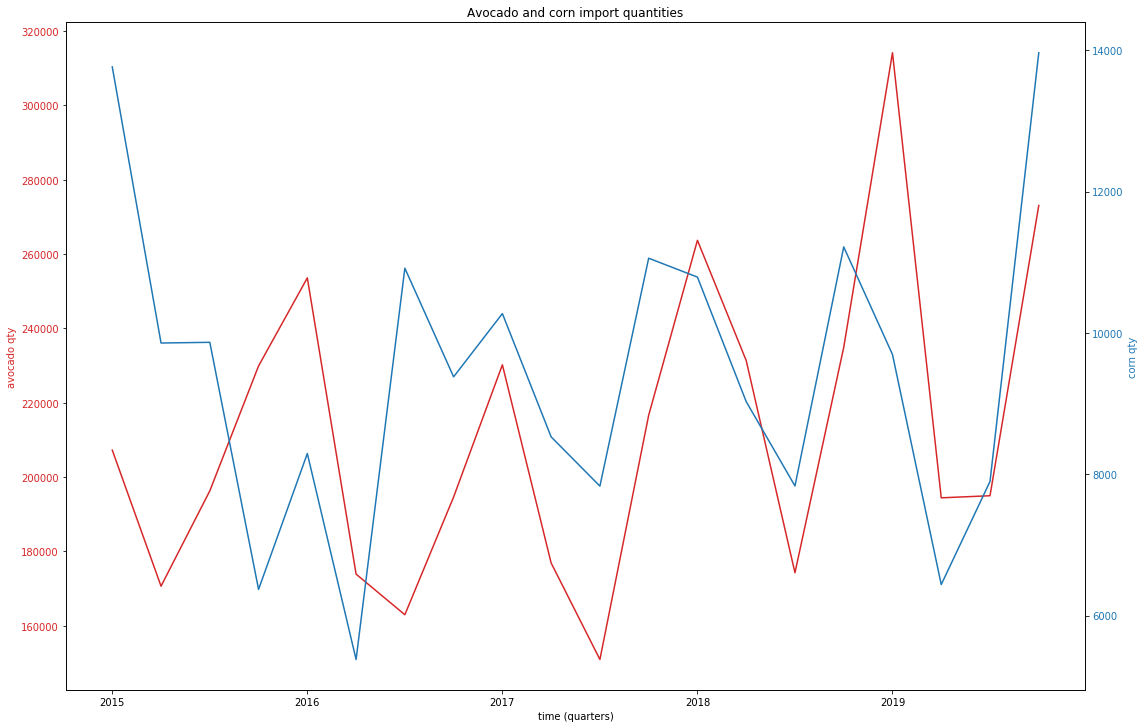

In [68]:
x = [j for j in range(0,20)]

fig, ax1 = plt.subplots(figsize = (16,10))

color = 'tab:red'
ax1.set_xlabel('time (quarters)')
ax1.set_ylabel('avocado qty', color=color)
ax1.plot(x, fsda_df['avocado qty'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

plt.xticks([j for j in range(0,19,4)], range(2015,2020))

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('corn qty', color=color)  # we already handled the x-label with ax1
ax2.plot(x, fsda_df['corn qty'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Avocado and corn import quantities')
plt.savefig('Images/avo_corn.png')
plt.show()

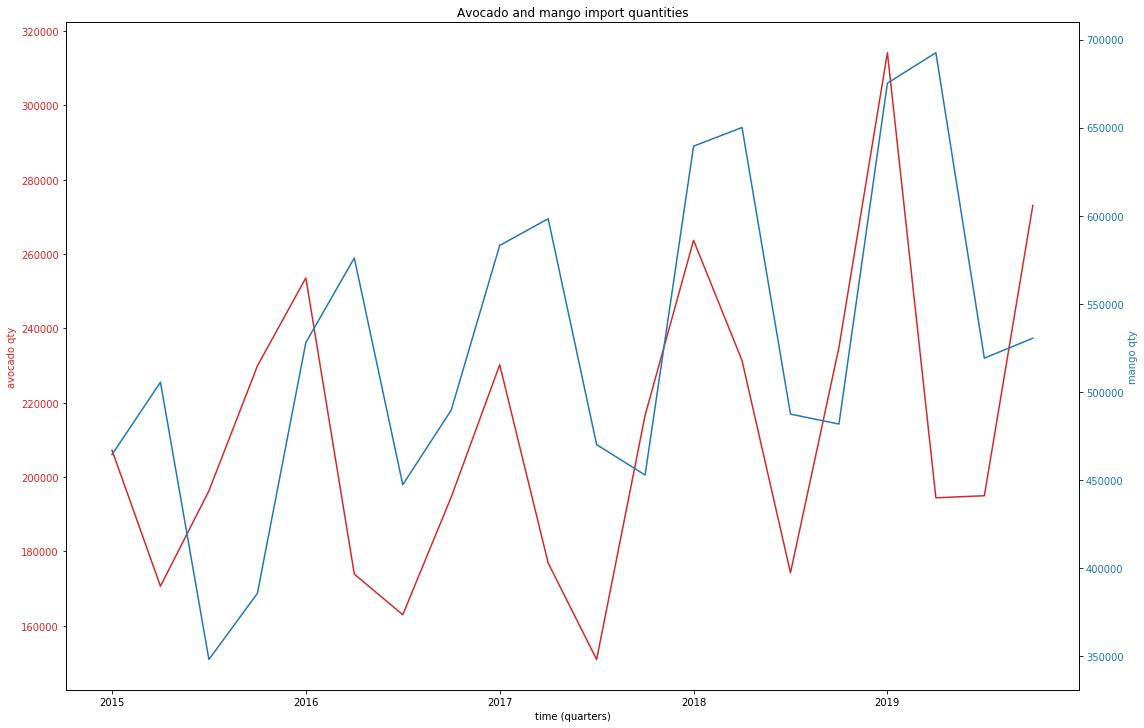

In [69]:
x = [j for j in range(0,20)]

fig, ax1 = plt.subplots(figsize = (16,10))

color = 'tab:red'
ax1.set_xlabel('time (quarters)')
ax1.set_ylabel('avocado qty', color=color)
ax1.plot(x, fsda_df['avocado qty'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

plt.xticks([j for j in range(0,19,4)], range(2015,2020))

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('mango qty', color=color)  # we already handled the x-label with ax1
ax2.plot(x, fsda_df['mango qty'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Avocado and mango import quantities')
plt.savefig('Images/avo_mango.png')
plt.show()

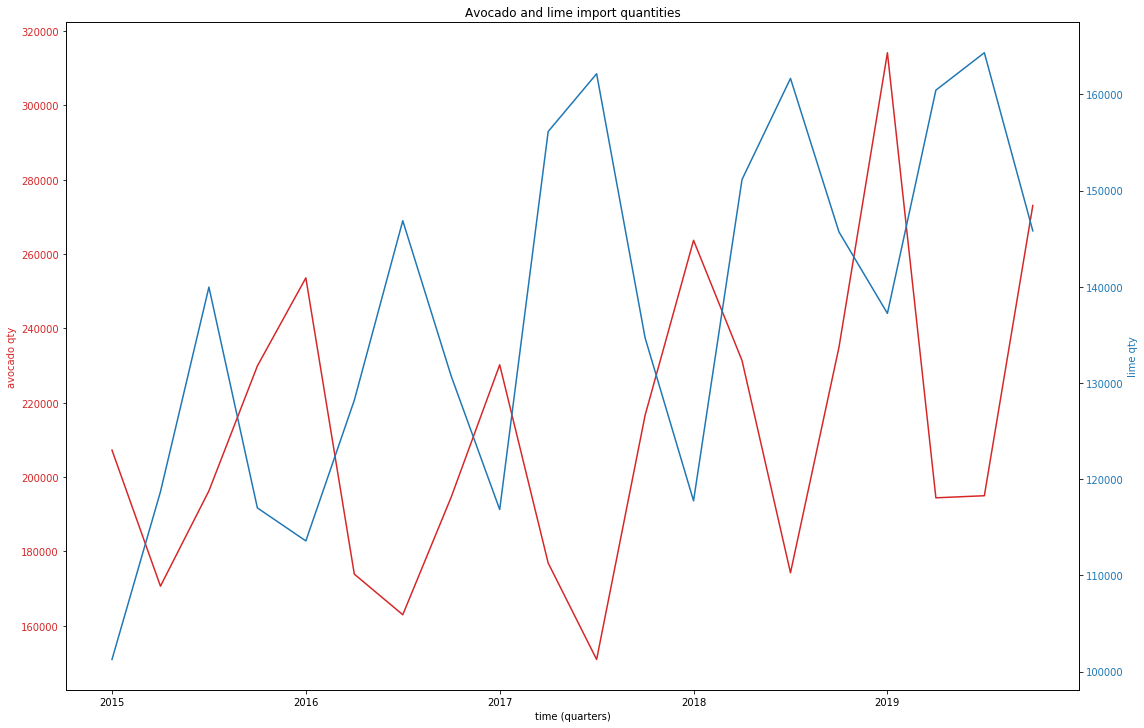

In [70]:
x = [j for j in range(0,20)]

fig, ax1 = plt.subplots(figsize = (16,10))

color = 'tab:red'
ax1.set_xlabel('time (quarters)')
ax1.set_ylabel('avocado qty', color=color)
ax1.plot(x, fsda_df['avocado qty'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

plt.xticks([j for j in range(0,19,4)], range(2015,2020))

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('lime qty', color=color)  # we already handled the x-label with ax1
ax2.plot(x, fsda_df['lime qty'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Avocado and lime import quantities')
plt.savefig('Images/avo_lime.png')
plt.show()